# Load the Fish data

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
fish = pd.read_csv('Fish.csv')

In [5]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Clean the data

In [6]:
fish.rename(columns={'Length1':'VerticalLength', 
                     'Length2':'DiagonalLength', 
                     'Length3':'CrossLength'}, inplace=True)

## Explore the data

In [7]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Species         159 non-null    object 
 1   Weight          159 non-null    float64
 2   VerticalLength  159 non-null    float64
 3   DiagonalLength  159 non-null    float64
 4   CrossLength     159 non-null    float64
 5   Height          159 non-null    float64
 6   Width           159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
fish.describe()

,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


# Identify Correlation

In [9]:
fishes = fish.drop(['Species'], axis='columns')
fishes.corr()[['Weight']]

,Weight
Weight,1.000000
VerticalLength,0.915712
DiagonalLength,0.918618
CrossLength,0.923044
Height,0.724345
Width,0.886507


<Axes: >

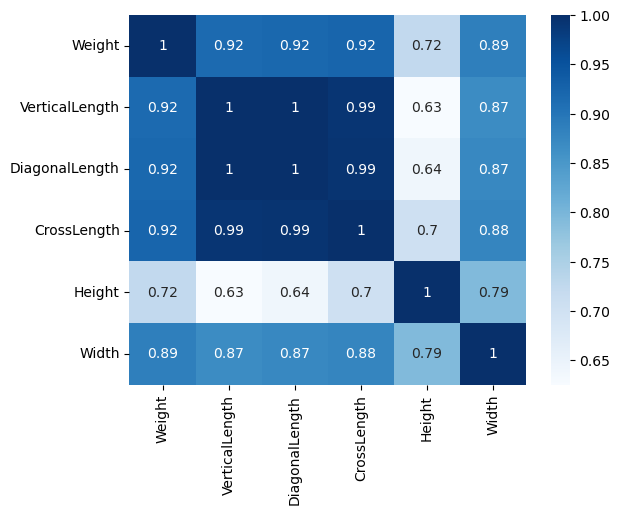

In [10]:
sns.heatmap(data=fishes.corr(), annot=True, cmap='Blues')

# Data Analysis

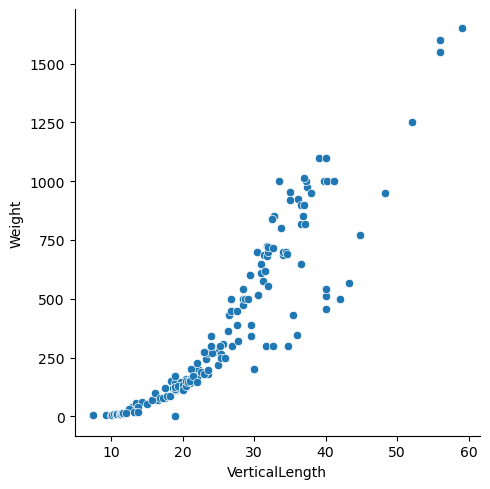

In [11]:
sns.relplot(data=fish, x='VerticalLength', y='Weight')

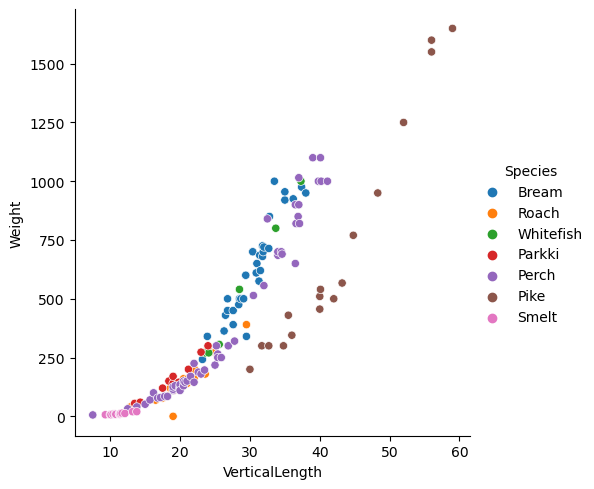

In [12]:
sns.relplot(data=fish, x='VerticalLength', y='Weight', hue='Species')

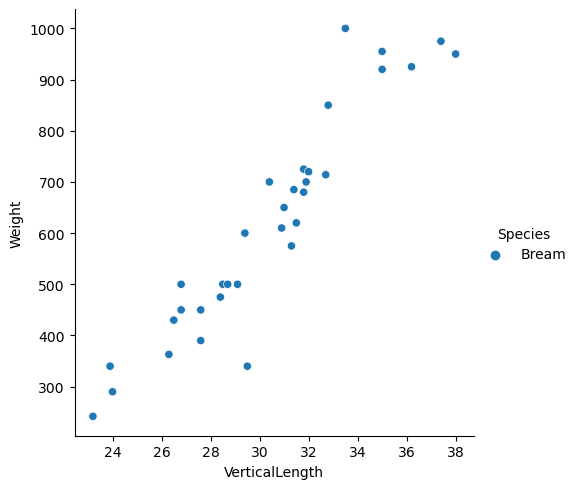

In [13]:
sns.relplot(data=fish.query('Species == "Bream"'), 
            x='VerticalLength', y='Weight', hue='Species')

### Performing Linear regression to find the weight of the Bream Species fish using other characteristics.

In [14]:
bream = fish.query('Species == "Bream"')

In [15]:
x_train, x_test, y_train, y_test = train_test_split(bream[['VerticalLength']], bream[['Weight']],train_size=0.8, random_state=25)

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
model.score(x_test, y_test)

0.9021912007598901

In [18]:
y_predicted = model.predict(x_test)
predicted = pd.DataFrame(y_predicted, columns = ['PredictedWeight'])

In [19]:
final = predicted.join([x_test.reset_index(drop=True),
                        y_test.reset_index(drop=True)])
final.head()

,PredictedWeight,VerticalLength,Weight
0,621.877787,30.4,700.0
1,1009.121826,37.4,975.0
2,942.737133,36.2,925.0
3,511.236633,28.4,475.0
4,621.877787,30.4,700.0


In [20]:
#Step : model accuracy
from sklearn.metrics import r2_score

In [21]:
r2_score(y_test,y_predicted)

0.9021912007598901

In [22]:
# rename the Weight column to indicate that it stores actual values, not predicted values
final.rename(columns={'Weight':'ActualWeight'}, inplace=True)
final.head()

,PredictedWeight,VerticalLength,ActualWeight
0,621.877787,30.4,700.0
1,1009.121826,37.4,975.0
2,942.737133,36.2,925.0
3,511.236633,28.4,475.0
4,621.877787,30.4,700.0


In [23]:
finalMelt = pd.melt(final, id_vars=['VerticalLength'], 
                    value_vars=['ActualWeight','PredictedWeight'], 
                    var_name='Variable', value_name='Value')
finalMelt.head()

,VerticalLength,Variable,Value
0,30.4,ActualWeight,700.0
1,37.4,ActualWeight,975.0
2,36.2,ActualWeight,925.0
3,28.4,ActualWeight,475.0
4,30.4,ActualWeight,700.0


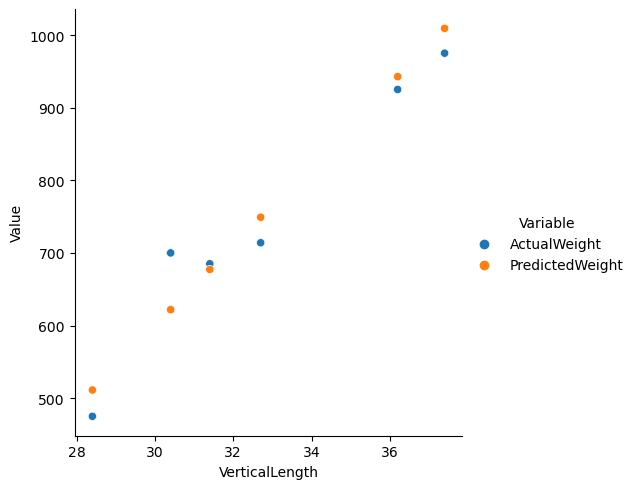

In [24]:
sns.relplot(data=finalMelt, x='VerticalLength', y='Value', hue='Variable')

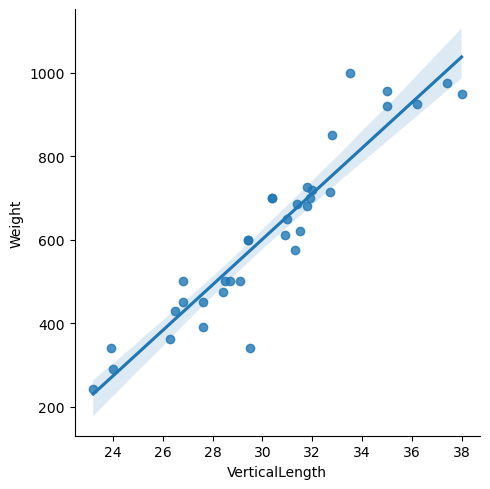

In [25]:
sns.lmplot(data=bream, x='VerticalLength', y='Weight')

### Plot the residuals

In [26]:
final['Residuals'] = final.ActualWeight - final.PredictedWeight

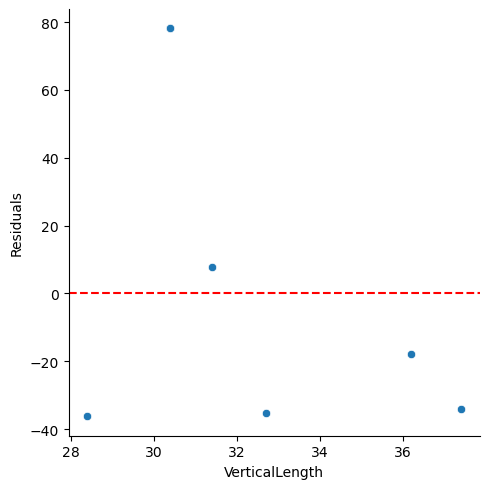

In [27]:
g = sns.relplot(data=final, x='VerticalLength', y='Residuals')
for ax in g.axes.flat:
    ax.axhline(0, ls='--', color='red')

<Axes: xlabel='VerticalLength', ylabel='Weight'>

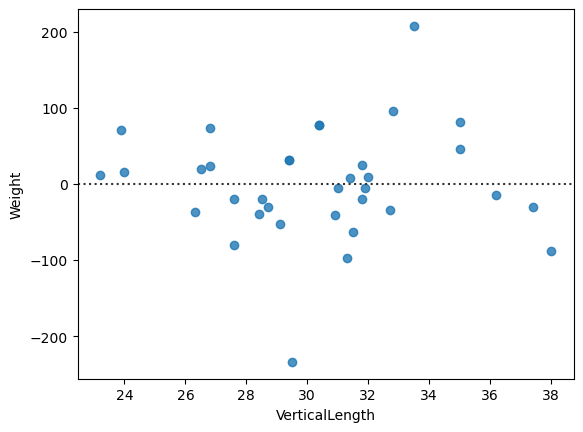

In [28]:
sns.residplot(data=bream, x='VerticalLength', y='Weight')

## KNN model building to predict the species of fish based on its characteristics like height, weight, length.

In [29]:
x=fish[['Weight','VerticalLength','DiagonalLength','CrossLength','Height','Width']].to_numpy()
y=fish['Species'].to_numpy()

In [30]:
y

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [31]:
##splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=35)

In [32]:
#Standardized data to same scale
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
x_standardized =standardizer.fit_transform(x_train)
x_test_std = standardizer.fit_transform(x_test)

In [33]:
##Step 3: Create knn model (fit the training data)
from sklearn.neighbors import KNeighborsClassifier
#We will assess results with different values of k.
knn = KNeighborsClassifier(n_neighbors=5).fit(x_standardized, y_train)

In [34]:
##Step 4: USing model to predict the class of test data
y_predicted= knn.predict(x_test_std)
y_predicted

array(['Roach', 'Perch', 'Smelt', 'Perch', 'Perch', 'Perch', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Perch', 'Perch', 'Perch', 'Pike',
       'Parkki', 'Bream', 'Bream', 'Perch', 'Perch', 'Pike', 'Perch',
       'Perch', 'Roach', 'Bream', 'Parkki', 'Perch', 'Bream', 'Perch',
       'Bream', 'Pike', 'Smelt', 'Perch'], dtype=object)

In [35]:
#Model Evaluation
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)

In [36]:
# Calculate & display metrics using weighted
print(accuracy_score(y_test, y_predicted))
print(precision_score(y_test, y_predicted, average = 'weighted'))
print(recall_score(y_test, y_predicted, average = 'weighted'))
print(f1_score(y_test, y_predicted, average = 'weighted'))

0.9375
0.9464285714285714
0.9375
0.9345467032967032


In [37]:
# Calculate & display metrics using macro
print(accuracy_score(y_test, y_predicted))
print(precision_score(y_test, y_predicted, average = 'macro'))
print(recall_score(y_test, y_predicted, average = 'macro'))
print(f1_score(y_test, y_predicted, average = 'macro'))

0.9375
0.9761904761904763
0.9027777777777778
0.93003663003663


In [38]:
#Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predicted)
conf_matrix

array([[ 8,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0],
       [ 0,  0,  1,  3,  0,  0],
       [ 0,  0,  1,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  3]], dtype=int64)

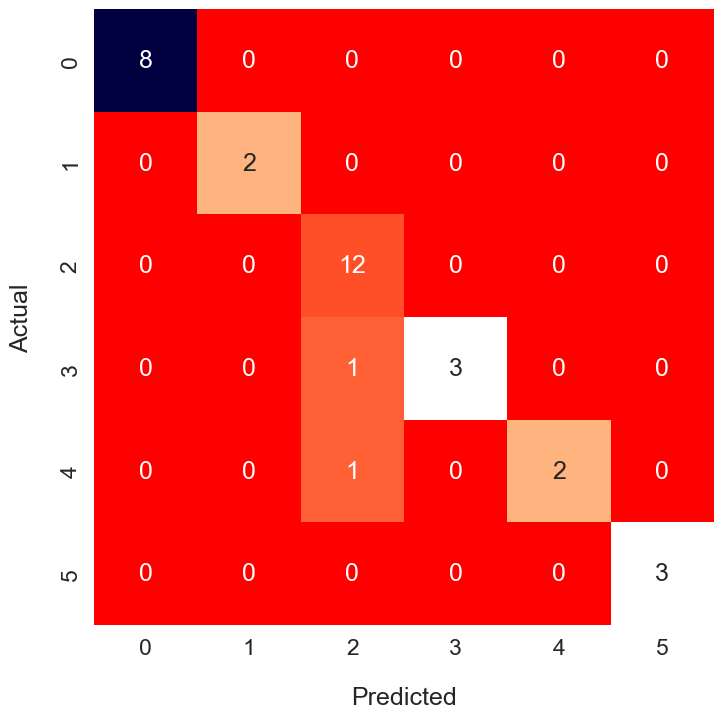

In [39]:
# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)
ax = sns.heatmap(
conf_matrix, # confusion matrix 2D array
annot=True, # show numbers in the cells
fmt='d', # show numbers as integers
cbar=False, # don't show the color bar
cmap='flag', # customize color map
vmax=175 # to get better color contrast
)
ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

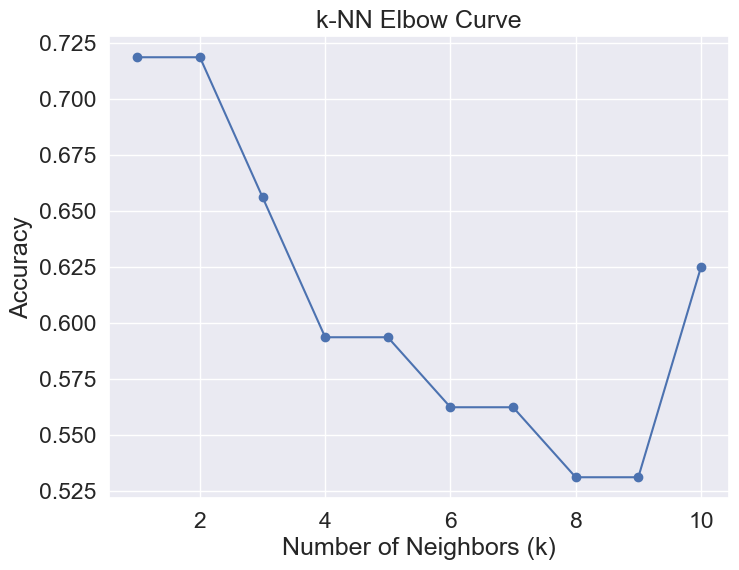

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Initialize lists to store values of k and their corresponding accuracies
k_values = list(range(1, 11))
accuracies = []

# Create an elbow curve by training k-NN models for different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    accuracy = knn.score(x_test, y_test)
    accuracies.append(accuracy)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Elbow Curve')
plt.grid(True)
plt.show()